# Aplicação Algoritimo KNN

importando as bibliotecas que usaremos

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Carregando o dataset e verificando as 3 primeiras linhas.

In [2]:
df = pd.read_csv('diabetes.csv', sep = ',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

Entendo um pouco mais do dataset, verificando se existem valores nulos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Separando os datasets de Teste e Treino

In [7]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']

Normalizando as variáveis do dataset X

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
x_nor = scaler.fit_transform(x)
print(x_nor)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [9]:
#trasnformando a matriz em um dataframe
x_norm = pd.DataFrame(x_nor, columns= x.columns)
x_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [10]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.3, random_state = 42, stratify = y)

Ultilizando o KNN para criar o modelo

In [11]:
knn = KNeighborsClassifier(n_neighbors= 4)
modelo_knn = knn.fit(x_treino,y_treino)
predicao = modelo_knn.predict(x_teste)
acuracia = accuracy_score(y_teste, predicao)
print(acuracia)

0.7272727272727273


Escolhendo melhor o valor de N

In [13]:
neighbors = np.arange(1,15)
treino_acuracia = np.empty(len(neighbors))
teste_acuracia = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_treino, y_treino)
    
    #Compute accuracy on the training set
    treino_acuracia[i] = knn.score(x_treino, y_treino)
    
    #Compute accuracy on the test set
    teste_acuracia[i] = knn.score(x_teste, y_teste)


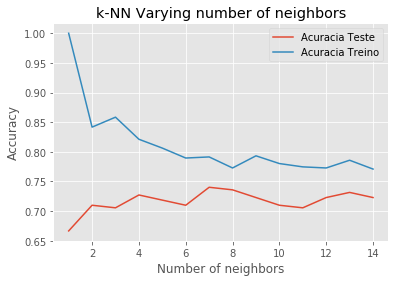

In [14]:


#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, teste_acuracia, label='Acuracia Teste')
plt.plot(neighbors, treino_acuracia, label='Acuracia Treino')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()



In [15]:
knn = KNeighborsClassifier(n_neighbors= 7)
modelo_knn = knn.fit(x_treino,y_treino)
predicao = modelo_knn.predict(x_teste)
acuracia = accuracy_score(y_teste, predicao)
print(acuracia)

0.7402597402597403


Matriz de Confusão

Uma matriz de confusão é uma tabela frequentemente usada para descrever o desempenho de um modelo de classificação
(ou "classificador") em um conjunto de dados de teste cujos valores verdadeiros são conhecidos. O Scikit-learn fornece facilidade
para calcular a matriz de confusão usando o método confusion_matrix.




In [20]:
y_pred = modelo_knn.predict(x_teste)
confusion_matrix(y_teste, y_pred)

array([[129,  21],
       [ 39,  42]])

True negative = 129

False positive = 21

True postive = 42

Fasle negative = 39

In [19]:
print(pd.crosstab(y_teste, y_pred))

col_0      0   1
Outcome         
0        129  21
1         39  42


Metricas de qualidade da classificação

In [21]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



Curva ROC (Reciever Operating Charecteristic)

É um gráfico da taxa positiva verdadeira em relação à taxa positiva falsa para os diferentes pontos de corte possíveis de um teste de diagnóstico.

Uma curva ROC demonstra várias coisas:

* Mostra a troca entre sensibilidade e especificidade (qualquer aumento na sensibilidade será acompanhado por uma diminuição na especificidade).

* Quanto mais próxima a curva segue a borda esquerda e depois a borda superior do espaço ROC, mais preciso é o teste.

* Quanto mais próxima a curva estiver da diagonal de 45 graus do espaço ROC, menos preciso será o teste.

* A área sob a curva é uma medida da precisão do teste.

In [24]:
y_pred_proba = modelo_knn.predict_proba(x_teste)

In [30]:
y_pred_prob = y_pred_proba[:,1]

In [32]:
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_prob)

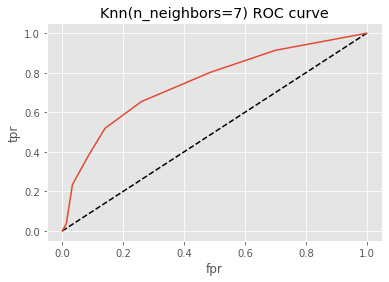

In [34]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn ROC curve')
plt.show()